In [2]:
!pip install yfinance
!pip install pandas
!pip install matplotlib

import yfinance as yf
import pandas as pd
import matplotlib_inline

apple = yf.Ticker("AAPL")

!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json

import json
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
    # Print the type of data variable    
    print("Type:", type(apple_info))


'wget' is not recognized as an internal or external command,
operable program or batch file.


FileNotFoundError: [Errno 2] No such file or directory: 'apple.json'

In [7]:
import yfinance as yf
import pandas as pd
import matplotlib_inline

apple = yf.Ticker("AMD")

!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json

import json
with open('amd.json') as json_file:
    amd_info = json.load(json_file)
    # Print the type of data variable    
    print("Type:", type(amd_info))
amd_info
print(amd_info['country'])

'wget' is not recognized as an internal or external command,
operable program or batch file.


FileNotFoundError: [Errno 2] No such file or directory: 'amd.json'

In [13]:
import requests
import json

# URL of the JSON file
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json'

# Download the file
response = requests.get(url)

# Save the file locally
with open('amd.json', 'wb') as f:
    f.write(response.content)

# Now load the JSON data
with open('amd.json') as json_file:
    amd_info = json.load(json_file)
    
# Print the type of the data variable
print("Type:", type(amd_info))

# Access and print the 'country' key from the JSON data
if 'country' in amd_info:
    print(amd_info['country'])
else:
    print("Key 'country' not found in the JSON data.")


Type: <class 'dict'>
United States


In [14]:
  print("Sector:", amd_info['sector'])

Sector: Technology


In [15]:
amd_history = amd.history(period="max")
print(amd_history.head())

NameError: name 'amd' is not defined

In [16]:
import yfinance as yf

# Create a Ticker object for AMD
amd = yf.Ticker("AMD")

# Get the historical data for the maximum available period
amd_history = amd.history(period="max")

# Display the first few rows of the data
print(amd_history.head())

                           Open      High       Low     Close  Volume  \
Date                                                                    
1980-03-17 00:00:00-05:00   0.0  3.302083  3.125000  3.145833  219600   
1980-03-18 00:00:00-05:00   0.0  3.125000  2.937500  3.031250  727200   
1980-03-19 00:00:00-05:00   0.0  3.083333  3.020833  3.041667  295200   
1980-03-20 00:00:00-05:00   0.0  3.062500  3.010417  3.010417  159600   
1980-03-21 00:00:00-05:00   0.0  3.020833  2.906250  2.916667  130800   

                           Dividends  Stock Splits  
Date                                                
1980-03-17 00:00:00-05:00        0.0           0.0  
1980-03-18 00:00:00-05:00        0.0           0.0  
1980-03-19 00:00:00-05:00        0.0           0.0  
1980-03-20 00:00:00-05:00        0.0           0.0  
1980-03-21 00:00:00-05:00        0.0           0.0  


In [17]:
print(amd.actions)

                           Dividends  Stock Splits
Date                                              
1980-10-24 00:00:00-04:00        0.0           2.0
1982-10-28 00:00:00-04:00        0.0           1.5
1983-08-23 00:00:00-04:00        0.0           2.0
2000-08-22 00:00:00-04:00        0.0           2.0


In [18]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

data  = requests.get(url).text
print(data)

<!DOCTYPE html><html id="atomic" class="NoJs chrome desktop" lang="en-US"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark('PageStart');</script><meta charset="utf-8"/><title>Netflix, Inc. (NFLX) Stock Historical Prices &amp; Data - Yahoo Finance</title><meta name="keywords" content="NFLX, Netflix, Inc., NFLX historical prices, Netflix, Inc. historical prices, historical prices, stocks, quotes, finance"/><meta http-equiv="x-dns-prefetch-control" content="on"/><meta property="twitter:dnt" content="on"/><meta property="fb:app_id" content="458584288257241"/><meta name="theme-color" content="#400090"/><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="description" lang="en-US" content="Discover historical prices for NFLX stock on Yahoo Finance. View daily, weekly or monthly format back to when Netflix, Inc. stock was issued."/><meta name="oath:guce:consent-host" content="guce.yahoo.com"/><met

In [19]:
soup = BeautifulSoup(data, 'html.parser')

In [20]:
netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

In [21]:
# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    # Finally we append the data of each row to the table
    netflix_data = pd.concat([netflix_data,pd.DataFrame({"Date":[date], "Open":[Open], "High":[high], "Low":[low], "Close":[close], "Adj Close":[adj_close], "Volume":[volume]})], ignore_index=True)    

In [22]:
netflix_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,"78,560,600",528.21
1,"May 01, 2021",512.65,518.95,478.54,502.81,"66,927,600",502.81
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,"111,573,300",513.47
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,"90,183,900",521.66
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,"61,902,300",538.85


In [23]:
read_html_pandas_data = pd.read_html(url)

In [25]:
read_html_pandas_data = pd.read_html(str(soup))

In [26]:
netflix_dataframe = read_html_pandas_data[0]

netflix_dataframe.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,78560600
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,66927600
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,111573300
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,90183900
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,61902300


In [27]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [28]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [30]:
tsla = yf.Ticker("TSLA")
tsla_history = tsla.history(period="max")
tsla_history.reset_index(inplace=True)
print(tsla_history.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [32]:
import requests

# URL of the webpage containing Tesla revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the webpage and save the response text
response = requests.get(url)

# Save the text of the response as a variable named html_data
html_data = response.text



In [34]:
import requests
from bs4 import BeautifulSoup

# URL of the webpage containing Tesla revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the webpage and save the response
response = requests.get(url)

# Save the text of the response as a variable named html_data
html_data = response.content

# Parse the HTML data using BeautifulSoup with the html.parser
soup = BeautifulSoup(html_data, 'html.parser')

In [35]:
from bs4 import BeautifulSoup
import pandas as pd

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table containing the Tesla revenue data
# This example assumes the first table is the one we want
table = soup.find_all('table')[0]

# Extract the rows from the table
rows = table.find_all('tr')

# Extract the data into a list
data = []
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])

# Convert the list into a DataFrame
tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

# Display the first few rows of the DataFrame
print(tesla_revenue.head())


   Date  Revenue
0  None     None
1  2021  $53,823
2  2020  $31,536
3  2019  $24,578
4  2018  $21,461


In [37]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

In [38]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [39]:
# Display the last 5 rows of the tesla_revenue DataFrame
print(tesla_revenue.tail())


    Date Revenue
9   2013    2013
10  2012     413
11  2011     204
12  2010     117
13  2009     112


In [41]:
import yfinance as yf

# Create a ticker object for GameStop
gme = yf.Ticker("GME")

# Extract the historical stock data for GameStop
gme_history = gme.history(period="max")

gme_history.reset_index(inplace=True)

# Display the first few rows of the data
print(gme_history.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666417  1.666417  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [43]:
import requests

# URL of the webpage containing the GME revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Download the webpage content
response = requests.get(url)

# Save the response content as html_data_2
html_data_2 = response.text

In [45]:
from bs4 import BeautifulSoup

# Parse the HTML data using BeautifulSoup and the html.parser
soup = BeautifulSoup(html_data_2, "html.parser")

In [47]:
import pandas as pd
from bs4 import BeautifulSoup

# Parse the HTML data using BeautifulSoup and the html.parser
soup = BeautifulSoup(html_data_2, "html.parser")

# Extract the table with GameStop Revenue
tables = pd.read_html(str(soup))
gme_revenue = tables[1]  # The table is located at index 1

# Rename the columns to 'Date' and 'Revenue'
gme_revenue.columns = ['Date', 'Revenue']

# Remove the comma and dollar sign from the Revenue column
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$', "", regex=True)

# Display the first few rows to verify
print(gme_revenue.tail())


          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


In [48]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def make_graph(stock_data, revenue_data, stock_name):
    # Create subplots: one for stock price and one for revenue
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                        subplot_titles=(f'{stock_name} Stock Price', f'{stock_name} Revenue'),
                        vertical_spacing=0.2)

    # Add stock price data to the first subplot
    fig.add_trace(
        go.Scatter(x=stock_data.index, y=stock_data['Close'], mode='lines', name='Stock Price'),
        row=1, col=1
    )

    # Add revenue data to the second subplot
    fig.add_trace(
        go.Bar(x=revenue_data['Date'], y=revenue_data['Revenue'], name='Revenue'),
        row=2, col=1
    )

    # Update layout for titles and axis labels
    fig.update_layout(
        title=f'{stock_name} Stock and Revenue Data',
        xaxis_title='Date',
        yaxis_title='Stock Price',
        xaxis2_title='Date',
        yaxis2_title='Revenue',
        xaxis_rangeslider_visible=False
    )

    # Show the plot
    fig.show()


In [49]:
# Filter Tesla stock data up to June 2021
tesla_history_filtered = tsla_history[tsla_history.index <= '2021-06-30']

# Call the make_graph function
make_graph(tesla_history_filtered, tesla_revenue, 'Tesla')


TypeError: Invalid comparison between dtype=int64 and str

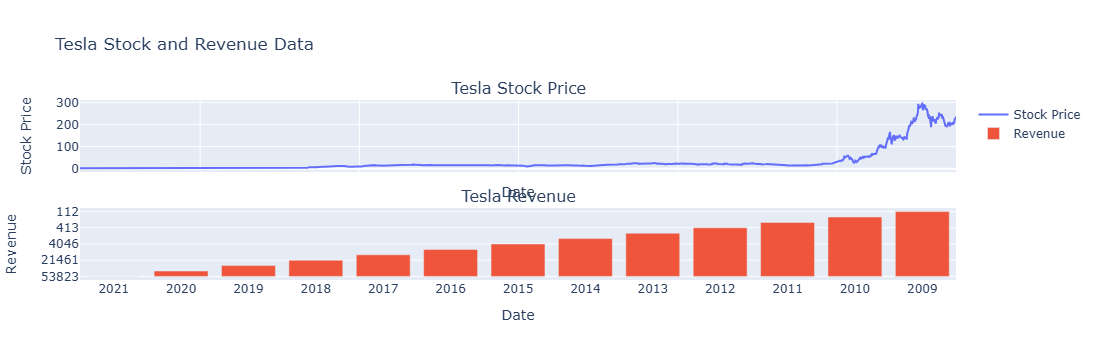

In [51]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Fetch Tesla stock data
tsla = yf.Ticker("TSLA")
tsla_history = tsla.history(period="max")

# Convert index to datetime
tsla_history.index = pd.to_datetime(tsla_history.index)

# Filter Tesla stock data up to June 2021
tesla_history_filtered = tsla_history[tsla_history.index <= '2021-06-30']

# Define the make_graph function
def make_graph(stock_data, revenue_data, stock_name):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                        subplot_titles=(f'{stock_name} Stock Price', f'{stock_name} Revenue'),
                        vertical_spacing=0.2)
    fig.add_trace(
        go.Scatter(x=stock_data.index, y=stock_data['Close'], mode='lines', name='Stock Price'),
        row=1, col=1
    )
    fig.add_trace(
        go.Bar(x=revenue_data['Date'], y=revenue_data['Revenue'], name='Revenue'),
        row=2, col=1
    )
    fig.update_layout(
        title=f'{stock_name} Stock and Revenue Data',
        xaxis_title='Date',
        yaxis_title='Stock Price',
        xaxis2_title='Date',
        yaxis2_title='Revenue',
        xaxis_rangeslider_visible=False
    )
    fig.show()
# Call the make_graph function
make_graph(tesla_history_filtered, tesla_revenue, 'Tesla')


In [55]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the make_graph function
def make_graph(stock_data, revenue_data, stock_name):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                        subplot_titles=(f'{stock_name} Stock Price', f'{stock_name} Revenue'),
                        vertical_spacing=0.2)
    
    fig.add_trace(
        go.Scatter(x=stock_data.index, y=stock_data['Close'], mode='lines', name='Stock Price'),
        row=1, col=1
    )
    
    fig.add_trace(
        go.Bar(x=revenue_data['Date'], y=revenue_data['Revenue'], name='Revenue'),
        row=2, col=1
    )
    
    fig.update_layout(
        title=f'{stock_name} Stock and Revenue Data',
        xaxis_title='Date',
        yaxis_title='Stock Price',
        xaxis2_title='Date',
        yaxis2_title='Revenue',
        xaxis_rangeslider_visible=False
    )
    
    fig.show()


NameError: name 'gme_data_filtered' is not defined

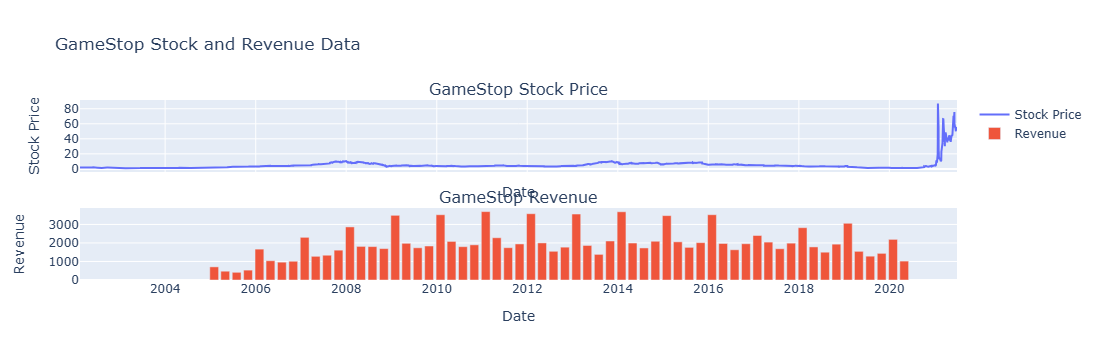

In [59]:
import yfinance as yf
import pandas as pd

# Fetch GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Convert index to datetime
gme_data.index = pd.to_datetime(gme_data.index)

# Filter GameStop stock data up to June 2021
gme_data_filtered = gme_data[gme_data.index <= '2021-06-30']

import requests
from bs4 import BeautifulSoup

# Webscrape GameStop revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data_2 = response.text

soup = BeautifulSoup(html_data_2, 'html.parser')
table = soup.find_all("tbody")[1]
rows = table.find_all("tr")

# Extract data into DataFrame
data = []
for row in rows:
    cols = row.find_all("td")
    date = cols[0].text.strip()
    revenue = cols[1].text.strip()
    data.append([date, revenue])

gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',|\$',"", regex=True).astype(float)
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the make_graph function
def make_graph(stock_data, revenue_data, stock_name):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                        subplot_titles=(f'{stock_name} Stock Price', f'{stock_name} Revenue'),
                        vertical_spacing=0.2)
    
    fig.add_trace(
        go.Scatter(x=stock_data.index, y=stock_data['Close'], mode='lines', name='Stock Price'),
        row=1, col=1
    )
    
    fig.add_trace(
        go.Bar(x=revenue_data['Date'], y=revenue_data['Revenue'], name='Revenue'),
        row=2, col=1
    )
    
    fig.update_layout(
        title=f'{stock_name} Stock and Revenue Data',
        xaxis_title='Date',
        yaxis_title='Stock Price',
        xaxis2_title='Date',
        yaxis2_title='Revenue',
        xaxis_rangeslider_visible=False
    )
    
    fig.show()

make_graph(gme_data_filtered, gme_revenue, 'GameStop')
